In [79]:
pip install cookiecutter


     ---------------------------------------- 96.6/96.6 kB 2.7 MB/s eta 0:00:00
     -------------------------------------- 199.1/199.1 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 78.2/78.2 kB 4.5 MB/s eta 0:00:00


In [60]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Import Data

In [44]:
test = pd.read_csv(r'C:\Users\jkim\OneDrive - Lambeth Council\Documents\test.csv')
train = pd.read_csv(r'C:\Users\jkim\OneDrive - Lambeth Council\Documents\train.csv')

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
region_mapping = {'male':1, 'female':0, 'C':0, 'Q':1, 'S':2}
train=train.assign(Sex = train.Sex.map(region_mapping))
train=train.assign(Embarked = train.Embarked.map(region_mapping))

In [9]:
sum(train.Cabin.isna())

687

In [4]:
trainnon= train.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis= 1)
trainnon.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [5]:
travgage = round(trainnon.Age.mean(), 1)

In [6]:
trainnon.Age= trainnon.Age.fillna(travgage)

In [8]:
trainnon= trainnon.dropna()
trainnon

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2.0
1,1,1,0,38.0,1,0,71.2833,0.0
2,1,3,0,26.0,0,0,7.9250,2.0
3,1,1,0,35.0,1,0,53.1000,2.0
4,0,3,1,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2.0
887,1,1,0,19.0,0,0,30.0000,2.0
888,0,3,0,29.7,1,2,23.4500,2.0
889,1,1,1,26.0,0,0,30.0000,0.0


array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Fare'}>]], dtype=object)

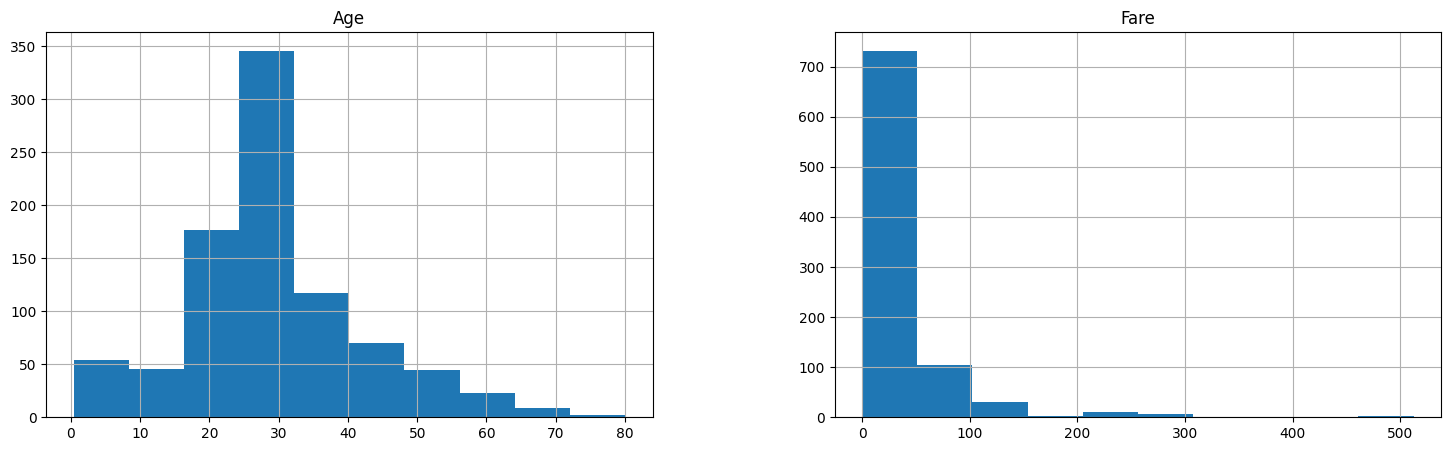

In [63]:
trainnon.hist(['Age', 'Fare'], figsize=(18,5))

In [66]:
trainnon['Fare'][trainnon['Fare']<300].sort_values(ascending=False)

27     263.000
341    263.000
438    263.000
88     263.000
742    262.375
        ...   
815      0.000
466      0.000
806      0.000
481      0.000
597      0.000
Name: Fare, Length: 886, dtype: float64

In [67]:
trainnon['Fare'][trainnon['Fare']>300] = 263.0

In [10]:
X = trainnon.drop(['Survived'], axis= 1)
y = trainnon.Survived

### Scale Data

In [36]:
PredictorScaler=StandardScaler()
PredictorScalerFit=PredictorScaler.fit(X)
X=PredictorScalerFit.transform(X)

In [74]:
X.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [12]:
X.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
len(X)

889

In [45]:
passengerID = test['PassengerId']
test= test.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis= 1)
test=test.assign(Sex = test.Sex.map(region_mapping))
test=test.assign(Embarked = test.Embarked.map(region_mapping))

In [50]:
teavgage = round(test.Age.mean(), 1)
test.Age= test.Age.fillna(teavgage)
test.Fare= test.Fare.fillna(test.Fare.mean())
standardtest=PredictorScalerFit.transform(test)

In [48]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Method 1: Logistic Regression (score .66027)

In [78]:
## must do cross validation or bootstrapping
log = LogisticRegression(penalty='l2', solver='saga')
log.fit(X, y)

LogisticRegression(solver='saga')

In [52]:
predicted=log.predict(test.loc[:, test.columns != 'PassengerId'])

C:\Users\jkim\AppData\Local\miniconda3\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [53]:
len(test)

418

In [57]:
submission = passengerID

In [58]:
submission = submission.to_frame()
submission['Survived'] = predicted

In [59]:
submission.to_csv('submission.csv', index=False)

# Random Forest (0.76076)

In [14]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

In [31]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X, y)

In [32]:
predictedrf = clf.predict(test.loc[:, test.columns != 'PassengerId'])

In [33]:
submissionrf = test['PassengerId']
submissionrf = submissionrf.to_frame()
submissionrf['Survived'] = predictedrf
submissionrf.to_csv('submissionrf.csv', index=False)

# Boosting

In [ ]:
#Light on sklearn

# Ensemble Learner

# Neural Network

In [72]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [73]:
classifier = tf.keras.Sequential()
# Defining the Input layer and FIRST hidden layer,both are same!
# relu means Rectifier linear unit function
classifier.add(Dense(units=10, input_dim=9, kernel_initializer='uniform', activation='relu'))
 
#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
 
# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
 
# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 
# fitting the Neural Network on the training data
survivalANN_Model=classifier.fit(X_train,y_train, batch_size=10 , epochs=10, verbose=1)
 
# fitting the Neural Network on the training data
survivalANN_Model=classifier.fit(X_train,y_train, batch_size=10 , epochs=10, verbose=1)

NameError: name 'Dense' is not defined